# Super Resolution GAN

In [1]:
# TensorFlow
import tensorflow as tf
import tensorflow_hub as hub

# Requests
import cv2
import requests
import numpy as np
import matplotlib.pyplot as plt

### Settings

In [2]:
ESRGAN_MODEL_PATH = "https://tfhub.dev/captain-pool/esrgan-tf2/1"
# download the pretrained model from the above url

### Load model

In [3]:
%%time
# Downloading and loading the model
model = hub.load(ESRGAN_MODEL_PATH)

CPU times: user 6.96 s, sys: 512 ms, total: 7.47 s
Wall time: 7.46 s


### Load image

In [4]:
# Mounting Google drive which has the low resolution images in the folder SET5LR4
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# function to load an image
def download_image(path):
    
    content = cv2.imread(path)
    #image_array = np.asarray(bytearray(content), dtype=np.uint8)
    image = cv2.cvtColor(content, cv2.COLOR_BGR2RGB)
    
    return image

In [6]:
# function to plot an image
def plot_image(image):
    plt.figure(figsize=(10,10))
    plt.title(image.shape)
    plt.imshow(image)
    plt.show()

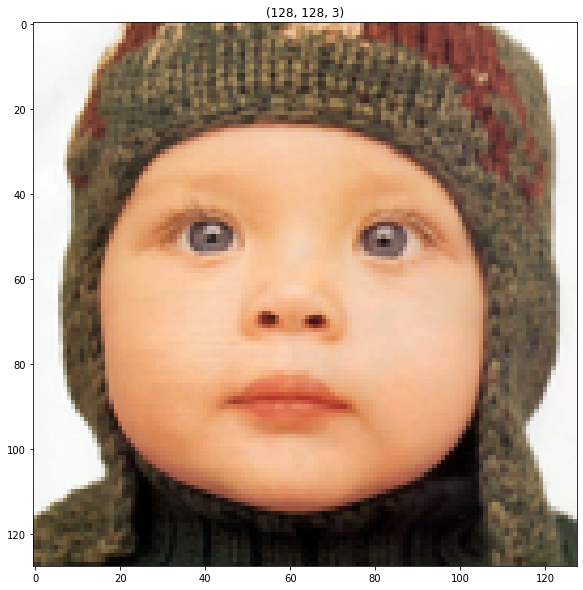

In [7]:
url = '/content/drive/MyDrive/Set5LR4/img_001_SRF_4_LR.png'
test_image = download_image(url)
plot_image(test_image)

### Pre-process image

In [8]:
# functio to prepocess the image
def preprocess_image(image):
    """
    Pre process image for model
    """
    image_size = (tf.convert_to_tensor(test_image.shape[:-1]) // 4) * 4
    cropped_image = tf.image.crop_to_bounding_box(image, 0, 0, image_size[0], image_size[1])
    new_image = tf.cast(cropped_image, tf.float32)
    
    return tf.expand_dims(new_image, 0)

### Run model

In [9]:
def run(image):
    """
    Run super resolution model
    """
    preprocessed_image = preprocess_image(image)
    new_image = model(preprocessed_image) # predicting the high resolution image
    return tf.squeeze(new_image) / 255.0

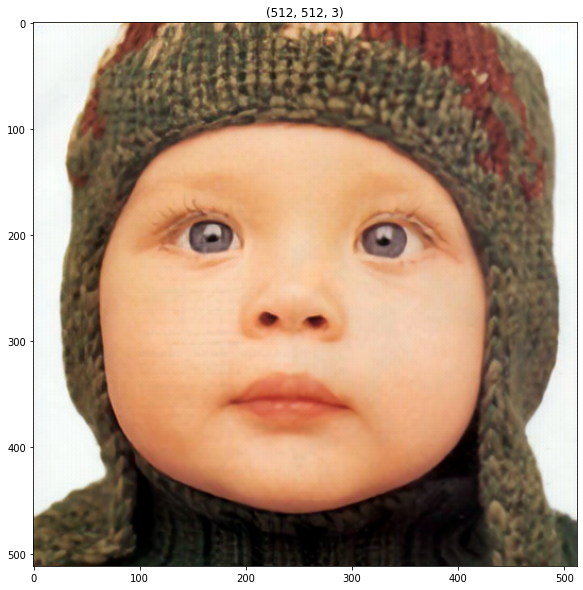

CPU times: user 9.07 s, sys: 561 ms, total: 9.63 s
Wall time: 6.1 s


In [10]:
%%time
fake_image = run(test_image)
plot_image(fake_image)

### Test model

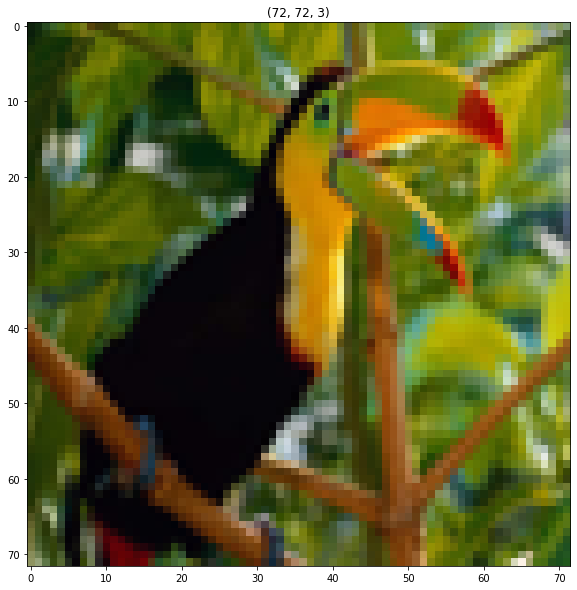

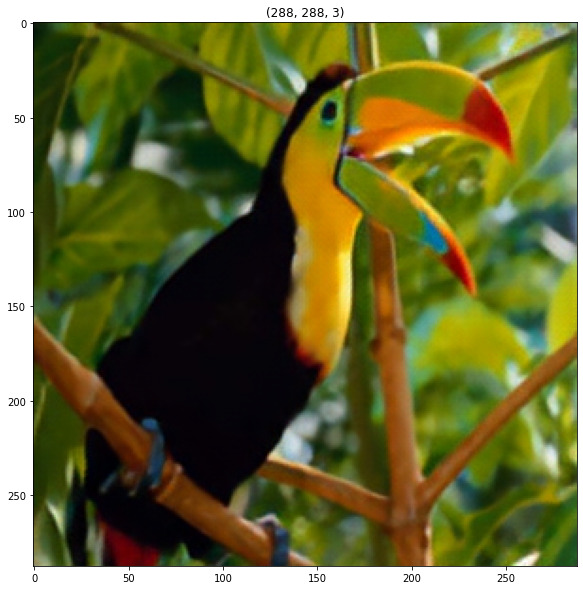

In [17]:
path='/content/drive/MyDrive/Set5LR4/img_002_SRF_4_LR.png'
test_image = download_image(path)
plot_image(test_image)
fake_image = run(test_image)
plot_image(fake_image)

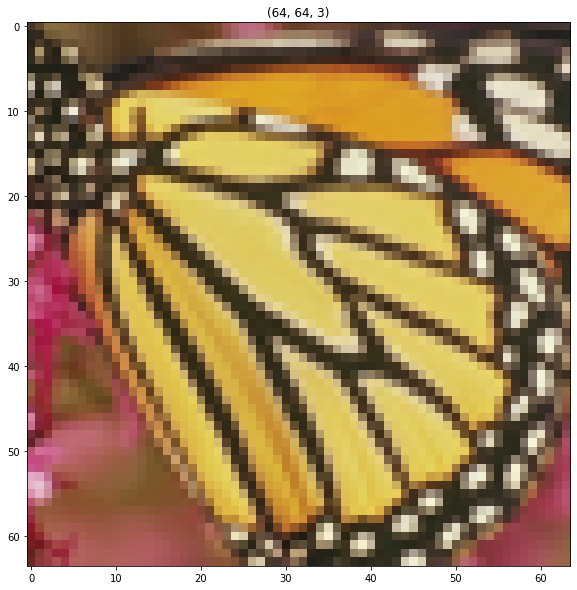

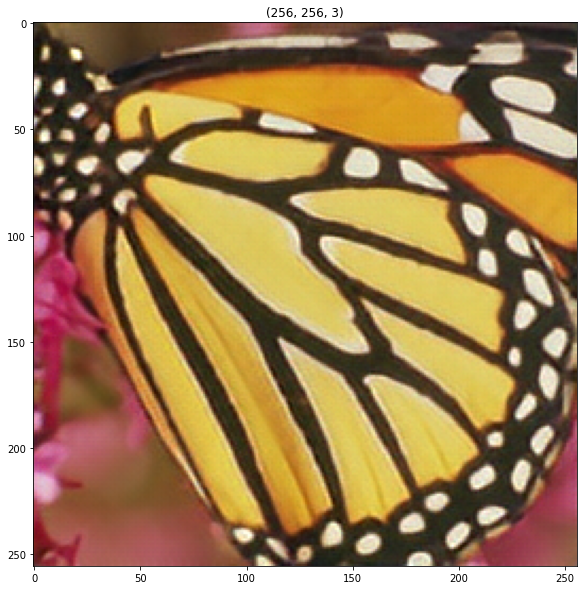

CPU times: user 3.74 s, sys: 175 ms, total: 3.91 s
Wall time: 3.96 s


In [12]:
%%time
path='/content/drive/MyDrive/Set5LR4/img_003_SRF_4_LR.png'
test_image = download_image(path)
plot_image(test_image)
fake_image = run(test_image)
plot_image(fake_image)

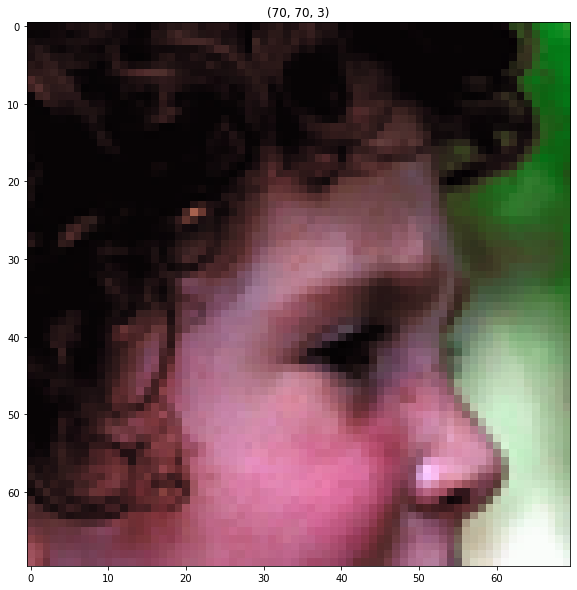

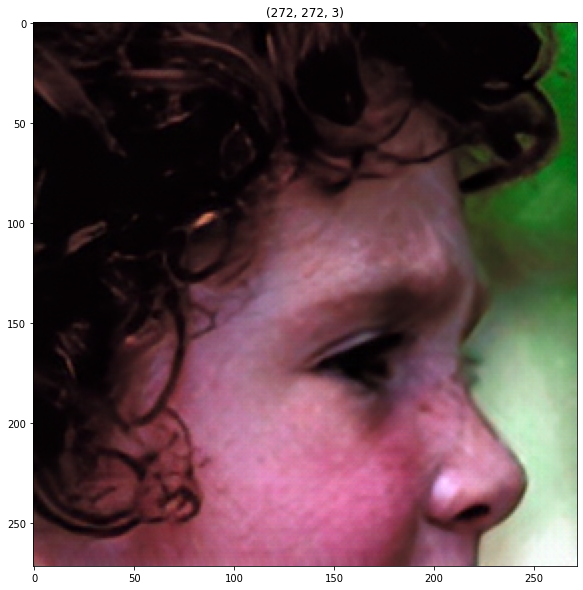

CPU times: user 4.46 s, sys: 190 ms, total: 4.65 s
Wall time: 3.89 s


In [13]:
%%time
path='/content/drive/MyDrive/Set5LR4/img_004_SRF_4_LR.png'
test_image = download_image(path)
plot_image(test_image)
fake_image = run(test_image)
plot_image(fake_image)

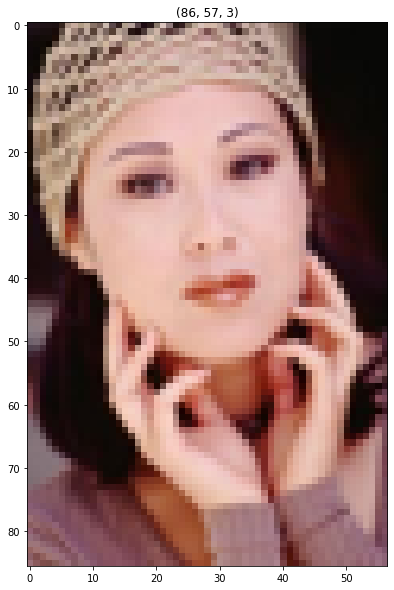

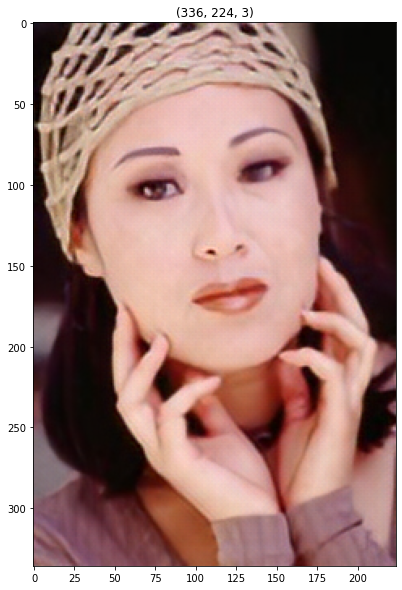

In [18]:
path='/content/drive/MyDrive/Set5LR4/img_005_SRF_4_LR.png'
test_image = download_image(path)
plot_image(test_image)
fake_image = run(test_image)
plot_image(fake_image)